 <font size="8">  Analyzing FordGo Bike Dataset 2018


### by Shubhashri Chavan

# Introduction


- <font size="4"> The FordGo Bike rental service is a public bike sharing system in San Francisco. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. It's a fun, convenient and affordable way to get around. There are two type of users i.e., Customers and Subscribers (having membership).

## Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from requests import get
import requests
import glob
import os
import zipfile
import io

In [2]:
for month in range(1, 13):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    print(month_leading_zero)
    bike_data_url_2018 = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + \
    '-fordgobike-tripdata.csv.zip'
    response_2018 = requests.get(bike_data_url_2018)
    unzipped_files_2018 = zipfile.ZipFile(io.BytesIO(response_2018.content))
    unzipped_files_2018.extractall()

01
02
03
04
05
06
07
08
09
10
11
12


In [3]:
path='C:/Users/Shubhashri/Documents/Data_Analysis/Project_final'
files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('master_data.csv', index = False)

In [4]:
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No


In [6]:
#Read the data from csv
bike_data=pd.read_csv('master_data.csv')

In [7]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [17]:
bike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [18]:
bike_data.isnull().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            11771
start_station_name          11771
start_station_latitude          0
start_station_longitude         0
end_station_id              11771
end_station_name            11771
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          110718
member_gender              110367
bike_share_for_all_trip         0
dtype: int64

In [19]:
# Removing the null entries from the dataset
bike_data.dropna(axis=0,inplace=True)

In [20]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration_sec             int64  
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  member_birth_year        float64
 14  member_gender            object 
 15  bike_share_for_all_trip  object 
dtypes: float64(7), int64(2), object(7)
memory usage: 225.9+ MB


In [21]:
bike_data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [22]:
bike_data.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No


In [23]:
# Converting datatypes :

bike_data['bike_id']=bike_data['bike_id'].astype('object')


bike_data['start_time']=pd.to_datetime(bike_data['start_time'])
bike_data['end_time']=pd.to_datetime(bike_data['end_time'])

bike_data['start_station_id']=bike_data['start_station_id'].astype('object')
bike_data['end_station_id']=bike_data['end_station_id'].astype('object')

bike_data['user_type'] = bike_data['user_type'].astype('category')
bike_data['member_gender'] = bike_data['member_gender'].astype('category')

In [24]:
print(bike_data['start_time'].dtype)
print(bike_data['end_time'].dtype)

datetime64[ns]
datetime64[ns]


In [25]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), object(6)
memor

In [26]:
print(bike_data['bike_id'].dtype)

object


In [27]:
male_prop=bike_data[bike_data['member_gender']=='Male']['member_gender'].count()/bike_data['member_gender'].count()
male_prop

0.7347136698446677

In [28]:
female_prop=1-male_prop
female_prop

0.2652863301553323

In [29]:
subs_prop=bike_data[bike_data['user_type']=='Subscriber']['user_type'].count()/bike_data['user_type'].count()
subs_prop

0.8856258426372738

In [30]:
bike_data['member_birth_year'].dtype

dtype('float64')

In [31]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 16 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
dtypes: category(2), datetime64[ns](2), float64(5), int64(1), object(6)
memor

In [32]:
bike_data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


In [33]:
bike_data.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year
count,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06
mean,7.728624e+02,3.776877e+01,-1.223511e+02,3.776887e+01,-1.223506e+02,1.983061e+03
std,1.943048e+03,1.015663e-01,1.193663e-01,1.014133e-01,1.187729e-01,1.045133e+01
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.881000e+03
25%,3.440000e+02,3.777106e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.978000e+03
50%,5.430000e+02,3.778107e+01,-1.223971e+02,3.778127e+01,-1.223959e+02,1.985000e+03
75%,8.390000e+02,3.779728e+01,-1.222876e+02,3.779728e+01,-1.222894e+02,1.991000e+03
max,8.628100e+04,3.788022e+01,-1.218333e+02,3.788022e+01,-1.218333e+02,2.000000e+03


In [34]:
# Adding weekday, month and hours column to the dataset:

bike_data['day_of_the_week']=bike_data['start_time'].dt.day_name()
bike_data['month']=bike_data['start_time'].dt.month_name()
bike_data['duration_mins']=bike_data['duration_sec']/60
bike_data['start_hour_of_the_day'] = bike_data.start_time.dt.strftime('%H')
bike_data['start_month_no']=bike_data.start_time.dt.month.astype(int)

#Calculating the age when the drive was taken :
bike_data['age']=2018-bike_data['member_birth_year']

In [35]:
bike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_the_week,month,duration_mins,start_hour_of_the_day,start_month_no,age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,Wednesday,January,1254.733333,22,1,32.0
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,Wednesday,January,1192.933333,14,1,22.0
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,Wednesday,January,666.100000,19,1,27.0
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,...,Subscriber,1988.0,Male,No,Wednesday,January,7.550000,23,1,30.0
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980.0,Male,No,Wednesday,January,3.000000,23,1,38.0


In [36]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  day_of_the_week          object        
 17  month                    ob

In [37]:
bike_data.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,duration_mins,start_month_no,age
count,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06,1.741556e+06
mean,7.728624e+02,3.776877e+01,-1.223511e+02,3.776887e+01,-1.223506e+02,1.983061e+03,1.288104e+01,6.966470e+00,3.493921e+01
std,1.943048e+03,1.015663e-01,1.193663e-01,1.014133e-01,1.187729e-01,1.045133e+01,3.238413e+01,3.123479e+00,1.045133e+01
min,6.100000e+01,3.726331e+01,-1.224737e+02,3.726331e+01,-1.224737e+02,1.881000e+03,1.016667e+00,1.000000e+00,1.800000e+01
25%,3.440000e+02,3.777106e+01,-1.224114e+02,3.777106e+01,-1.224094e+02,1.978000e+03,5.733333e+00,5.000000e+00,2.700000e+01
50%,5.430000e+02,3.778107e+01,-1.223971e+02,3.778127e+01,-1.223959e+02,1.985000e+03,9.050000e+00,7.000000e+00,3.300000e+01
75%,8.390000e+02,3.779728e+01,-1.222876e+02,3.779728e+01,-1.222894e+02,1.991000e+03,1.398333e+01,1.000000e+01,4.000000e+01
max,8.628100e+04,3.788022e+01,-1.218333e+02,3.788022e+01,-1.218333e+02,2.000000e+03,1.438017e+03,1.200000e+01,1.370000e+02


In [38]:
bike_data.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_the_week,month,duration_mins,start_hour_of_the_day,start_month_no,age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,Wednesday,January,1254.733333,22,1,32.0
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,Wednesday,January,1192.933333,14,1,22.0
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,Wednesday,January,666.100000,19,1,27.0


## What is the structure of your dataset?

The fordgobike dataset is a data collection of bike riders throughout the year of 2018. The dataset has tremendous data pertaining various fields as listed below:


- duration_sec

- start_time of the ride

- end_time of the ride

- start_station_id

- end_station_id

- start_station_name

- end_station_name

- start_station_latitude

- end_station_latitude

- start_station_longitude

- end_station_longitude

- bike_share_for_all_trip

The data fields related to the riders are as follows:
- user_type
- member_birth_year
- member_gender

The column duration_sec apeared difficult to be used for carrying out analysis. So, I converted the column to minutes:
- duration_mins

Furthermore, in order to unravel the complexity and make the data simpler to analyze, I added in following columns :
- day_of_the_week
- month
- start_hour_of_the_day
- age
- start_month_no

In [39]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1741556 entries, 0 to 1863719
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  day_of_the_week          object        
 17  month                    ob

## What is/are the main feature(s) of interest in your dataset?

`The factors that draw my attention are mainly the user_type and gender. I would like to know the variation in the duration of journey per user_type and gender. I would love to find answers to the questions like which user type takes long trips, which takes shorter trips ? What is the frequency of males and females hiring the bikes ? Does the bike hiring pattern change according to change in the day of the week ?`

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?


` The major and most important column label I find here is 'duration_mins' (Journey Duration in Mins). Journey Duration will show various trends in the data distribution according to the change in user_type,gender,months and week_of_the_day. By plotting graphs between these variables will help us gain clearer insights into the data.`

## Univariate Exploration

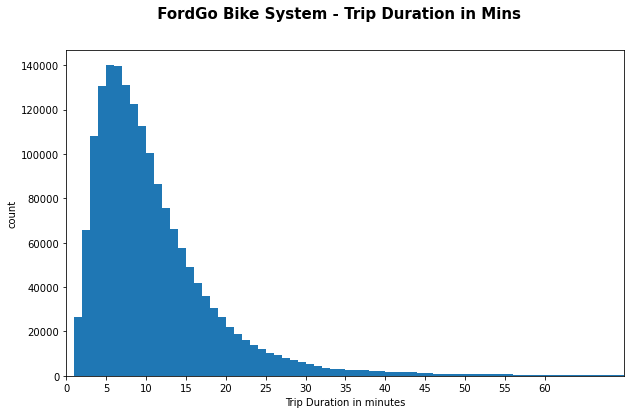

In [40]:
plt.figure(figsize=(10,6));
bins=np.arange(0,bike_data['duration_mins'].max()+1,1)
xticks=[0,5,10,15,20,25,30,35,40,45,50,55,60]
labels=['{}'.format(v) for v in xticks]
plt.xlim(0,70)
plt.hist(data=bike_data,x='duration_mins',bins=bins);
plt.xticks(xticks,labels);
plt.xlabel('Trip Duration in minutes');
plt.ylabel('count');
plt.suptitle(' FordGo Bike System - Trip Duration in Mins',fontsize=15,fontweight='bold');

### Here, we observe that the histogram is right skewed. We also see, how the frequency for the minutes >8 starts falling down wedge by wedge. This depicts that the fordgobike rental is preferably chosen by the users to travel a short distance.

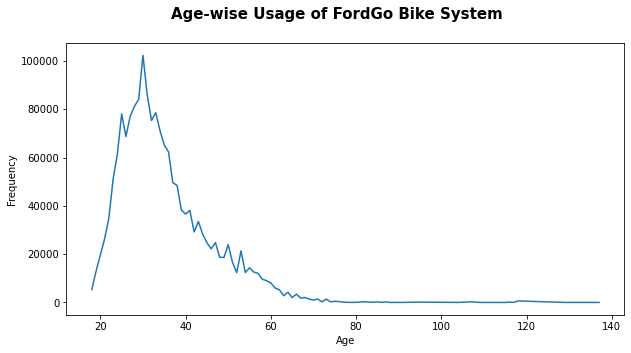

In [41]:
plt.figure(figsize=(10,5));
bike_data['age'].value_counts().sort_index().plot.line()
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.suptitle('Age-wise Usage of FordGo Bike System',fontsize=15,fontweight='bold');

## The age above 100 seems so unrealistic, so it's better we strip off the age values>100

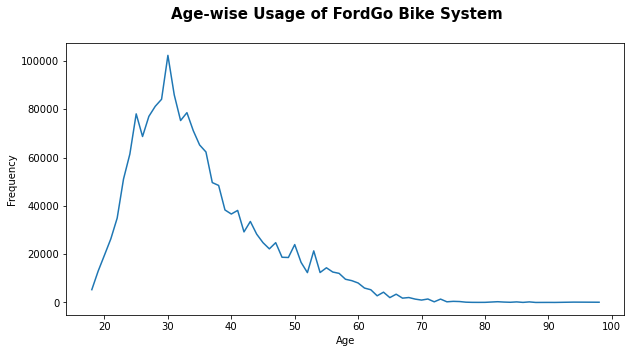

In [42]:
# Removing the entries having age>100 (outliers)
bike_data=bike_data[bike_data['age']<=100]

plt.figure(figsize=(10,5));
bike_data['age'].value_counts().sort_index().plot.line()
plt.xlabel('Age');
plt.ylabel('Frequency');
plt.suptitle('Age-wise Usage of FordGo Bike System',fontsize=15,fontweight='bold');

## The frequency of bike hiring falls down with the increase in age. There seems to be an elevation in the bike hiring for age group (18-32). This suggests us that the bike is hired more by the young generation than people above 32.

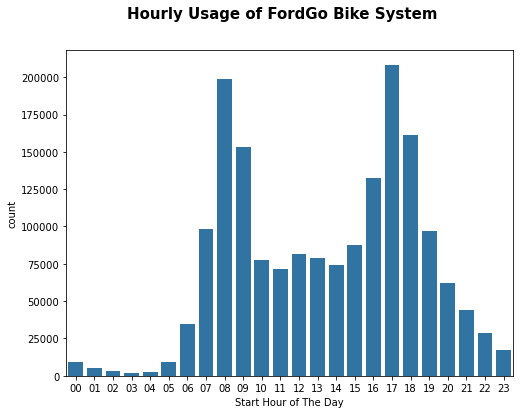

In [45]:
plt.figure(figsize=(8,6));
color=sb.color_palette()[0]
sb.countplot(data = bike_data, x ='start_hour_of_the_day',color=color);
plt.xlabel('Start Hour of The Day');
plt.suptitle('Hourly Usage of FordGo Bike System',fontsize=15,fontweight='bold');

## The count of bike rentals is enormously high at 8  in the morning and 5 in the afternoon. This suggests that most of the bikes are hired by daily office going folks, the reason being the bikes getting hired mostly at the start of office hours and when the office gets over.

In [46]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740396 entries, 0 to 1863719
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  day_of_the_week          object        
 17  month                    ob

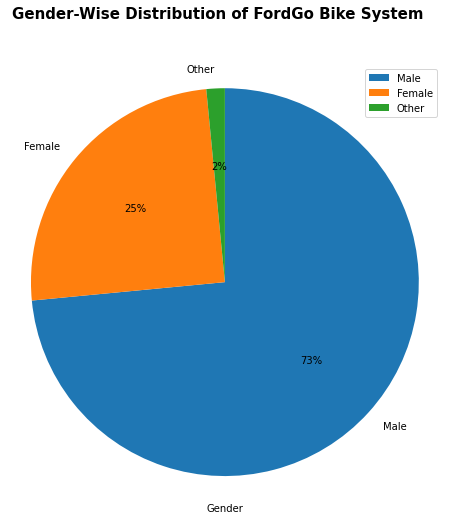

In [49]:
# code for the pie chart seen above
plt.figure(figsize=(8,8));
counts = bike_data['member_gender'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90,
        counterclock = False,autopct='%1.0f%%');
plt.axis('square');
plt.xlabel('Gender');
plt.suptitle('Gender-Wise Distribution of FordGo Bike System',fontsize=15,fontweight='bold');
plt.legend();

### The piechart plotted above shows the gender wise distribution of data. It becomes clear from the piechart that the percentage of females hiring bikes is far less than the males that is only 25% whereas males account for 73% of the total distribution and Others as less as 2%.

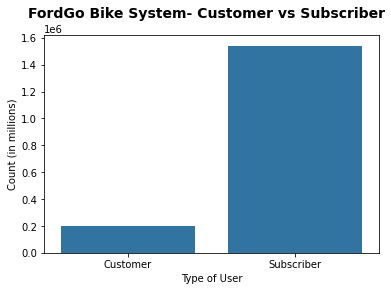

In [50]:
base_color=sb.color_palette()[0]
sb.countplot(data=bike_data,x='user_type',color=base_color);
plt.xlabel('Type of User');
plt.ylabel('Count (in millions)');
plt.suptitle('FordGo Bike System- Customer vs Subscriber',fontsize=14,fontweight='bold');

### The plot above depicts that the no. of subscribers/members hiring the bike rentals is more than the customers availing the bike service.

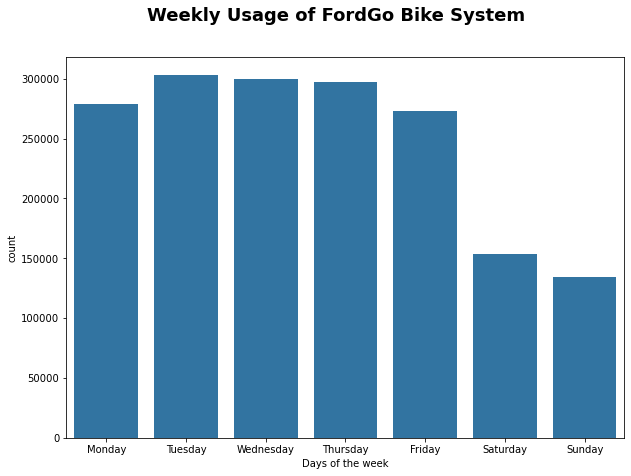

In [51]:
plt.figure(figsize=(10,7))
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color=sb.color_palette()[0]
sb.countplot(data=bike_data,x='day_of_the_week',color=base_color,order=order);
plt.xlabel('Days of the week');
plt.suptitle('Weekly Usage of FordGo Bike System',fontsize=18,fontweight='bold');

### There is an interesting observation that can be made here is, the frequency of bikes rented on weekdays is comparatively high than on the weekends. Through this, it can be said that maximum bikes are rented for travelling to the job destinations or to a nearby area where they can catch their buses/trains from.

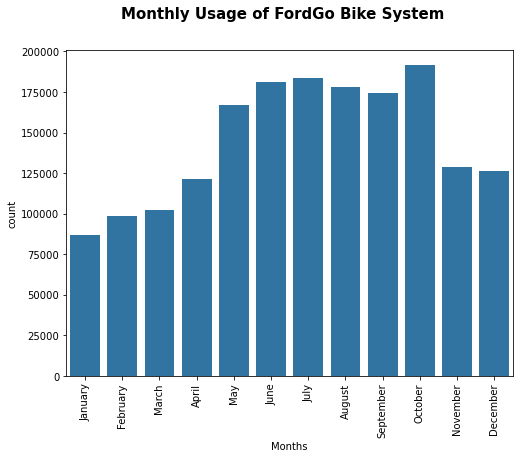

In [52]:
plt.figure(figsize=(8,6))
base_color=sb.color_palette()[0]
sb.countplot(data=bike_data,x='month',color=base_color);
plt.xticks(rotation=90);
plt.xlabel('Months');
plt.suptitle('Monthly Usage of FordGo Bike System',fontsize=15,fontweight='bold');

## There is an unusual pattern observed here. The bike rentals in the month of October  grow high than any other month of the year. Probably, because of the cool weather and  pleasant atmosphere they would want to have a city tour.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- In the column 'age', age values above 100 seemed so unrealistic. So, I stripped off the values greater than 100 which also helped me reduce outliers.


- Unusualness of data points was seen in the trend of variation that went from weekdays to weekends. The bike hiring drops as the weekdays are over and it's time for the weekend to roll in.


- The other variation I could notice is the elevation in bike hirings in the month of October.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

` Yes, I saw that it was literally absurd to plot the journey duration given in seconds to carry out analysis as it seemed to be widely scattered and converting the seconds everytime we saw the plot would be a tedious job. So, I converted the journey duration in secs to journey duration in minutes for the ease of plotting graphs and drawing out insights.`

## Bivariate Distribution

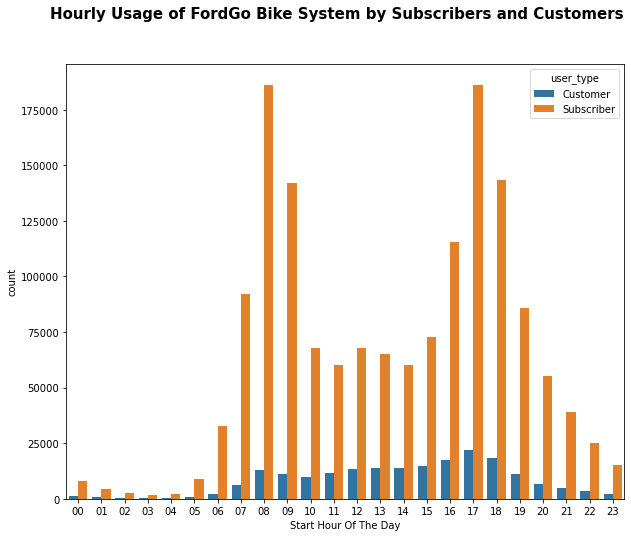

In [54]:
plt.figure(figsize=(10,8));
sb.countplot(data=bike_data,x='start_hour_of_the_day',hue='user_type');
plt.xlabel('Start Hour Of The Day');
plt.suptitle('Hourly Usage of FordGo Bike System by Subscribers and Customers',fontsize=15,fontweight='bold');

### It is evident from the countplot above that no matter what hour of the day it is, the subscriber count is always going to be higher than the customer count. The customers renting the bikes is high at 5 in the afternoon whereas, for subscribers it is high at 8 in the morning and 5 in the afternoon. Another observation here is, the bike frequency is too low in the ealy morning around 4 which means that the FordGoBike Service is not availed for early morning rides but it is more inclined towards daily trips for work.

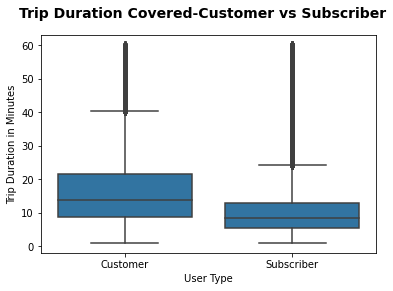

In [55]:
temp_data=bike_data.query('duration_mins<=60')
base_color=sb.color_palette()[0]
sb.boxplot(data=temp_data, x='user_type', y='duration_mins',color=base_color);
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minutes');
plt.suptitle('Trip Duration Covered-Customer vs Subscriber',fontsize=14,fontweight='semibold');

### Although, the subscribers are likely to hire more bikes than the customer,it is clear from the above boxplot that the journey taken by customers is long than that of the subscribers.

In [56]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1740396 entries, 0 to 1863719
Data columns (total 22 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  member_birth_year        float64       
 14  member_gender            category      
 15  bike_share_for_all_trip  object        
 16  day_of_the_week          object        
 17  month                    ob

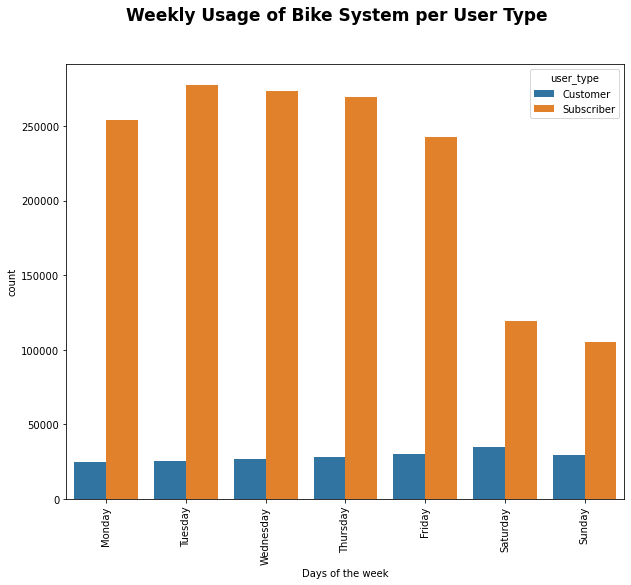

In [59]:
plt.figure(figsize=(10,8))
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.countplot(data=bike_data,x='day_of_the_week',hue='user_type',order=order)
plt.xticks(rotation=90);
plt.xlabel('Days of the week');
plt.suptitle('Weekly Usage of Bike System per User Type',fontweight='bold',fontsize=17);

### From the above plot, the decline in bike-rentals by the subscribers on weekends is so obvious to the eye whereas, the graph doesn't show much change for the customers. This suggests that, all the subscribers are job-going folks whereas the customers hire bike for their leisure pursuits. The graph for customer shows a minor inclination towards Saturdays. That being said, the customers are in no hurry and usually go out for rides on weekends to visit places in and around the city. Also, no matter what day of the week it is, subscriber count is always going to be higher than the customer count. Another thing to notice over here is, 'Tuesday' has highest no of riders out of all the days.

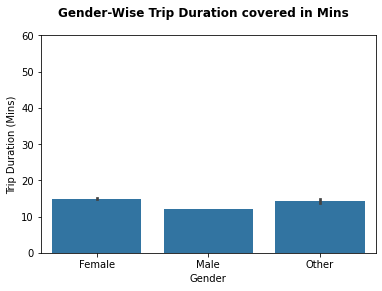

In [58]:
base_color=sb.color_palette()[0]
plt.ylim(0,60)
sb.barplot(data=bike_data,x='member_gender',y='duration_mins',color=base_color);
plt.xlabel('Gender');
plt.ylabel('Trip Duration (Mins)');
plt.suptitle('Gender-Wise Trip Duration covered in Mins',fontweight='bold');

### The above barplot suggests us that Females take longer trips than Males.

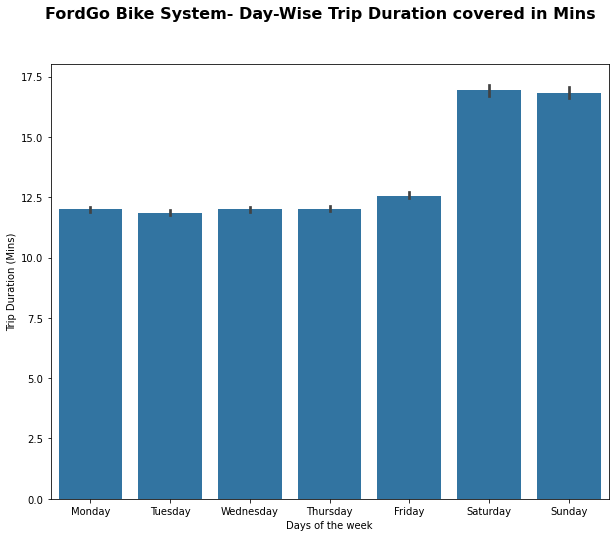

In [60]:
plt.figure(figsize=(10,8))
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.barplot(data=bike_data,x='day_of_the_week',y='duration_mins',color=base_color,order=order);
plt.xlabel('Days of the week');
plt.ylabel('Trip Duration (Mins)');
plt.suptitle('FordGo Bike System- Day-Wise Trip Duration covered in Mins',fontweight='bold',fontsize=16);

### From the observation carried out before, the weekends had substantially less count of bikes rented than on the weekdays. But, although the frequency of rentals is less on weekends, comparatively longer trips are made on weekends compared to the weekdays.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


` The Subscribers highly avail the bike service on the weekdays than the weekends. Exactly opposite follows for the customers. The customers usually prefer availing bike service on weekends more than on the weekdays.`

`Although, the frequency of females availing the service is far less than that of the males, females take longer trips than males.`


## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

`It is interesting to observe that high frequency of bikes are being hired by Subscribers in the month of October. Probably, because of the cool weather and  pleasant atmosphere they want to have a city tour.`

` From the observation carried out, the weekends had substantially less count of bikes rented than on the weekdays. But, although the frequency of rentals is less on weekends, comparatively long trips are made on weekends compared to the weekdays.`

## Multivariate Exploration

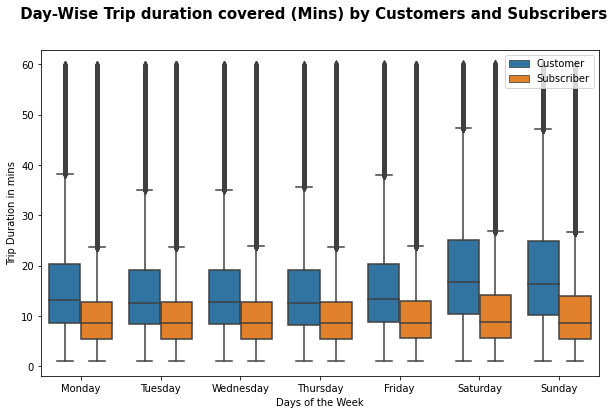

In [66]:
plt.figure(figsize=(10,6))
temp=bike_data[bike_data['duration_mins']<=60]
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
ax=sb.boxplot(x='day_of_the_week',y='duration_mins',hue='user_type',data=temp,order=order);
ax.legend(framealpha=1);
plt.xlabel('Days of the Week');
plt.ylabel('Trip Duration in mins');
plt.suptitle(' Day-Wise Trip duration covered (Mins) by Customers and Subscribers', fontweight='bold',fontsize=15);
plt.legend(loc='upper right');

### We can very well observe an elevation from weekdays to weekends for the duration of journey covered by the customers which means, the customers take even long trips on weekends compared to weekdays. However, we are uncertain about the trend that follows for the Subscribers from weekdays to weekends since this graph does not show much of a difference.

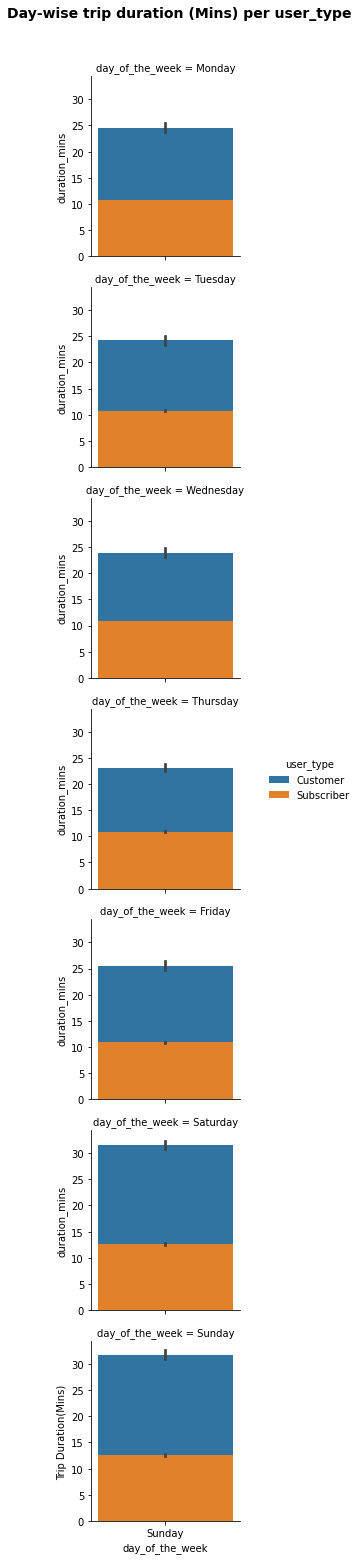

In [82]:
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = sb.FacetGrid(bike_data, row="day_of_the_week", hue="user_type",row_order=order);
g.map(sb.barplot, "day_of_the_week", "duration_mins");
g.add_legend(loc='center right');
plt.suptitle('Day-wise trip duration (Mins) per user_type',y=1.03,fontweight='bold', fontsize=14);
plt.ylabel('Trip Duration(Mins)');

### This graph makes it crystal clear that the trip duration for subscribers also rises from weekdays to weekends, except that there is not a substantial increase in the duration unlike it is for customers. In a nutshell, the longest possible trips are taken on weekends both by customers and subscribers. 

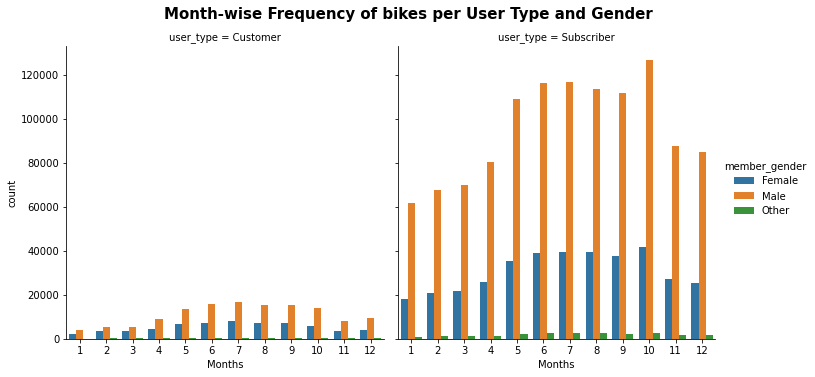

In [84]:
g=sb.catplot(data=bike_data, x='start_month_no', col="user_type", hue="member_gender", kind='count');
plt.suptitle('Month-wise Frequency of bikes per User Type and Gender', fontweight='bold',fontsize=15,y=1.04);
g.set_axis_labels("Months");

## The catplot clearly depicts that the no. of subscriber users is way more than that of the customer users. A pattern can be observed here, how the customers increase in number from January till July and then slowly, the graph goes down till the last month. Whereas, the subscriber count goes high in the month of October. Another noticable patern over here is that regardless of the month, male count is always the highest.

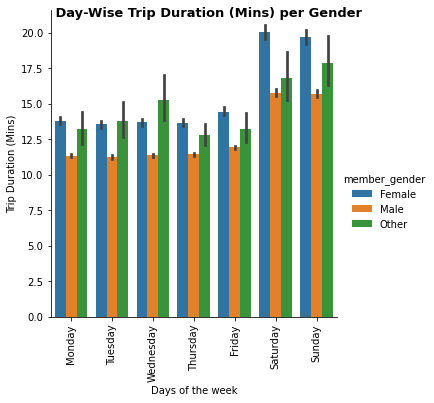

In [85]:
order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.catplot(x="day_of_the_week", y="duration_mins", hue="member_gender",
            kind="bar", data=bike_data,order=order);
plt.xticks(rotation=90);
plt.suptitle(' Day-Wise Trip Duration (Mins) per Gender',fontsize=13,fontweight='bold');
plt.xlabel('Days of the week');
plt.ylabel('Trip Duration (Mins)');

###  From, the graphs plotted previously, we know that the ratio of bike rentals between Male and Female is roughly 7:3  Here in this graph, we observe that the long travels are taken by females followed by others and then lastly by males. Travels on weekends being substantially long compared to the weekdays for all the three i.e.,  males, females and others.

In [29]:
bike_data.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_the_week,month,duration_mins,start_hour_of_the_day,age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,...,2765,Subscriber,1986.0,Male,No,Wednesday,January,1254.733333,22,32.0
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,...,3039,Customer,1996.0,Male,No,Wednesday,January,1192.933333,14,22.0
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,...,617,Subscriber,1991.0,Male,No,Wednesday,January,666.100000,19,27.0
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,110,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,134,Valencia St at 24th St,37.752428,...,3571,Subscriber,1988.0,Male,No,Wednesday,January,7.550000,23,30.0
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,...,1403,Subscriber,1980.0,Male,No,Wednesday,January,3.000000,23,38.0


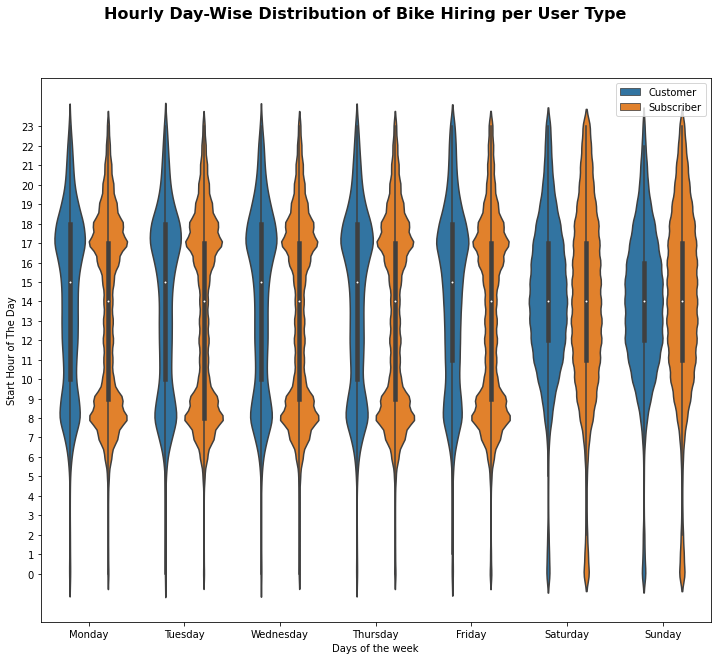

In [87]:
bike_data['start_hour_of_the_day']=bike_data['start_hour_of_the_day'].astype(int)
plt.figure(figsize=(12,10));
sb.violinplot(x='day_of_the_week',y='start_hour_of_the_day',hue='user_type',data=bike_data,order=order);
yticks=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
labels=['{}'.format(v) for v in yticks]
plt.yticks(yticks,labels);
plt.suptitle('Hourly Day-Wise Distribution of Bike Hiring per User Type', fontweight='bold',fontsize='16');
plt.xlabel('Days of the week')
plt.ylabel('Start Hour of The Day');
plt.legend();

### The clear picture is finally here. The violin plot above has a lot of interesting data to consume in. 

## Subscribers :

### The subscribers count seems bulging during the morning hours 8-9 (maximum at 8 a.m). The violin plot goes flattening  post 10 a.m till 3 p.m. and again starts swelling out till 5.30 p.m(maximum at 5 p.m) which pretty much suggests that they are working professionals who hire bikes for going to and from home for work. A noticable aspect here is that on weekends there is quite a less frequency of bikes being hired by the subscribers both on 9 in the morning or 5 in the evening. The reason being that they are tired working whole week and want to get some rest on weekends.


## Customers :

### The frequency of bikes being hired by customers in office hours is fairly less on weekdays whereas, they have maximum bike hiring post 5 pm on the weekdays probably to collect vegetables from the market  or some other work. The customers on weekends and prefer going out post 12 in the afternoon for roaming in and around the city on weekdays.

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


` Multivariate exploration helped me get to observe the data more closely and draw out insights`

` I discovered various trends in the data as how the trip durations increased dramatically from weekday to weekend regardless of the gender through the catplot(bar) `

` A pattern was seen in the bike hiring during the weekdays through the violinplot. Mostly, the subscribers to be precise availed the serice around 8-9 in the morning and 5 in the evening. Quite less bikes are hired on weekends by the subscribers around (8-9) in the morning and 5 in the evening. The customers seem to follow quite a different pattern. The most bike hirings by customers are post 5 p.m. during the weekdays and during the noon on the weekends.`



## Were there any interesting or surprising interactions between features?

`Some results after plotting various graphs against different variables seemed to have occured surprising to me`

`One of the interesting things I noticed about the data is that the females take longer trips than males on an average`

`Although, the weekends had substantially less count of bikes rented than on the weekdays, comparatively long trips were made on weekends compared to the weekdays.`


  #  <font size="6"> Reference

https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

https://seaborn.pydata.org/tutorial/categorical.html

https://towardsdatascience.com/data-visualization-a6dccf643fbb

https://stackoverflow.com/questions/32261619/how-to-add-legend-on-seaborn-facetgrid-bar-plot?rq=1

https://seaborn.pydata.org/generated/seaborn.lineplot.html
